# College Food Choices Survey

## Jessica Stapleton, Evan Russell, Matthew Cuneo


Diet has been documented as having an impact on the mental health of individuals including college students. The perception of college students is a care free attitude when selecting their diet. This analysis of a survey of Mercyhurst University students dietary habits will examine if the diets of their childhood guided their current diet, grades, current diet, and outlook on life.

The analysis will conducted by calculating a health score based on survey results per students then plotting the scores against life attitude and family history.



## Background

Overall wealthness of an individual has been shown through various studies to be associated with the quality of exercise and diet. Universities and colleges often provide recommendations to their student body for ways to maintain a healthy diet, exercise, and reduce stress. For example, Rutgers university has a list of 101 health and wellness tips published on their website that includes recommends like limiting junk food, eating fruits and veggies, and drinking water (Rutgers). Studies of Chilean college and Iranian medical students found that eating fruits and vegetables daily resulted in higher levels of happiness (Piqueras, et al 2011 and Lesani, Mohammadpoorasl 2016).



### Citations
 1. Piqueras, et al 2011 - https://www.researchgate.net/publication/296475425_Eating_breakfast_fruit_and_vegetable_intake_and_their_relation_with_happiness_in_college_students
 1. Lesani, Mohammadpoorsal 2016 - https://bmcpublichealth.biomedcentral.com/articles/10.1186/1471-2458-11-443
 1. Rutgers - https://wellnesscenter.camden.rutgers.edu/101-health-and-wellness-tips-for-college-students/
 1. https://www.consumerreports.org/mental-health/what-you-eat-can-make-you-happier/

## Dataset
A survey of 125 Mercyhurst University students was conducted and is available on kaggle.com (https://www.kaggle.com/datasets/borapajo/food-choices?select=food_coded.csv). The survey asked 125 students 60 questions about their childhood diet history, current diet, GPA, attitude about life, and various other items. The hosted dataset includes a text file that describes each of the questions and any domain applied to the expected answers. 

A large number of the attributes are coded values which will require translation based on information from an associated Microsoft Word document. The data was collected to see how important nutrition is for current college students and the impact of a childhood upbringing around food.


### Methods

The datasets contains several data type and formatting issues. Prior to any analysis the dataset must be cleaned by addressing issues such as a string entered for GPA, standardizing free text for multiple questions, and applying a generalization of their attitude about healthy diet selections.

A cleaned dataset will contain several parameters about diet choice that will be considered predictors and life wealthness parameters which will be the response variables.

#### Response Cleaning

Three metrics of life wealthness are included in the dataset: GPA, weight, and opinion if life is rewarding.

- _GPA_
    - Question: numerical, actual GPA
    - Expected values: 0 to 4
    - Issue: numerical and text values
    
    
- _weight_
    - Question: what is your weight in pounds?
    - Expected values: 0 < values
    - Issues: numerical and text values
    
    
- _life_rewarding_
    - Question: how likely are you to agree with the following statement: “I feel life is very rewarding!” ?
    - Expected values: 1 (strongly agree) to 10 (strongly disagree)
    - Issues: NaN values

Begin data cleaning by importing the dataset.

In [276]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from matplotlib import pyplot as plt
import plotly

In [281]:
df = pd.read_csv('food_coded.csv')
df.head(10)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,Unnamed: 61,61
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9,...,1,1165.0,345,car racing,5,1,1315,187,NaN,NaN
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1,...,2,725.0,690,Basketball,4,2,900,155,NaN,NaN
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1,...,5,1165.0,500,none,5,1,900,I'm not answering this.,NaN,NaN
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2,...,5,725.0,690,NaN,3,1,1315,"Not sure, 240",NaN,NaN
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1,...,4,940.0,500,Softball,4,2,760,190,NaN,NaN
5,2.25,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4,...,4,940.0,345,None.,1,2,1315,190,NaN,NaN
6,3.8,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",`,...,5,940.0,690,soccer,4,1,1315,180,NaN,NaN
7,3.3,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1,...,1,725.0,500,none,4,2,1315,137,NaN,NaN
8,3.3,1,1,430,NaN,420.0,1,"Donuts, ice cream, chips",Boredom,2,...,5,725.0,345,none,3,2,760,180,NaN,NaN
9,3.3,1,1,430,3.0,315.0,2,"Mac and cheese, chocolate, and pasta","Stress, anger and sadness",1,...,4,580.0,345,field hockey,5,1,900,125,NaN,NaN


#### GPA Cleaning

The mix of data type will be handled by using a regular expression to locate the numerical values if present and convert to float. If a value cannot be found, NaN will be used.

GPA type: object


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,Unnamed: 61,61
15,NaN,2,2,430,NaN,980.0,2,"cookies, donuts, candy bars",boredom,2,...,1,940.0,345,Hockey,1,2,1315,180,NaN,NaN
61,Personal,1,1,610,2.0,980.0,2,"Macaroons, truffles, peanut butter n chocolate...","I do not really eat ""comfort food"" but I guess...",3,...,2,725.0,500,NaN,3,1,1315,118,NaN,NaN
73,3.79 bitch,2,1,720,4.0,420.0,2,"Chips, ice cream","Boredom, stress",2,...,2,1165.0,850,baseball,4,1,1315,200,NaN,NaN
102,NaN,1,1,610,4.0,420.0,2,"Pizza, mashed potatoes, spaghetti","Anger, sadness",3,...,2,940.0,500,NaN,5,1,900,135,NaN,NaN
104,Unknown,1,1,720,3.0,420.0,2,"Chips, chocolate, ,mozzarella sticks","Boredom, sadness, anxiety",2,...,5,940.0,690,None at the moment,5,1,1315,230,NaN,NaN


GPA type: float64


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,Unnamed: 61,61
15,NaN,2,2,430,NaN,980.0,2,"cookies, donuts, candy bars",boredom,2,...,1,940.0,345,Hockey,1,2,1315,180,NaN,NaN
61,NaN,1,1,610,2.0,980.0,2,"Macaroons, truffles, peanut butter n chocolate...","I do not really eat ""comfort food"" but I guess...",3,...,2,725.0,500,NaN,3,1,1315,118,NaN,NaN
102,NaN,1,1,610,4.0,420.0,2,"Pizza, mashed potatoes, spaghetti","Anger, sadness",3,...,2,940.0,500,NaN,5,1,900,135,NaN,NaN
104,NaN,1,1,720,3.0,420.0,2,"Chips, chocolate, ,mozzarella sticks","Boredom, sadness, anxiety",2,...,5,940.0,690,None at the moment,5,1,1315,230,NaN,NaN


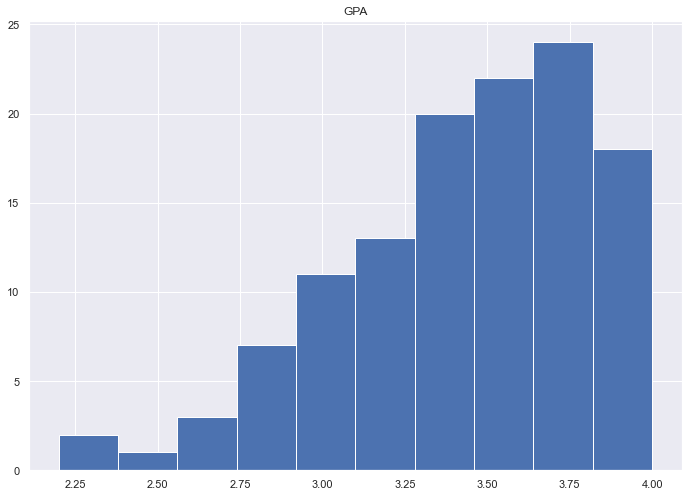

In [282]:
print(f'GPA type: {df["GPA"].dtypes}')
def check_decimal(x):
    try:
        float(x)
        return True
    except:
        return False
display(df.loc[~df['GPA'].apply(check_decimal) | df['GPA'].isna()])

# Find either decimal or numeric values. The decimal must be examined first because a decimal could incorrectly be considered a numeric.
df['GPA'] = df['GPA'].str.extract("(\d+\.\d+|\d*)")
# Replace blank values with NaN
df['GPA'] = df['GPA'].replace('^\s*$',np.nan,regex=True)
df['GPA'] = pd.to_numeric(df['GPA'])
print(f'GPA type: {df["GPA"].dtypes}')
display(df.loc[~df['GPA'].apply(check_decimal) | df['GPA'].isna()])
hist = df.hist('GPA')

#### Weight Cleaning

The mix of data type will be handled by using a regular expression to locate the numerical values if present and convert to float. If a value cannot be found, NaN will be used.

In [285]:
#Removing str from cells
df['weight']=df['weight'].astype(str)
df['weight'] = df['weight'].str.extract('(\d+)', expand=False)
#Removing NaN values
df["weight"] = pd.to_numeric(df["weight"], errors="ignore")
df = df[df['weight'].notna()]

#### Life_rewarding Cleaning

Drop NaN values.

In [287]:
#Life Rewarding column was far less cumbersome and I just needed to drop NaN values
df["life_rewarding"] = pd.to_numeric(df["life_rewarding"], errors="ignore")
df = df[df['life_rewarding'].notna()]

#### Predictor Cleaning

A collection of questions asked respondents to describe their dietary choices in a free text field. This approach resulted in a wide variety of answers, words, and formatting. The cleaning of these responses was completed by applying a function to each field and count the number of words associate with key food categories. After running the function a set of new columns are added to the data frame titled with the source column and food categories. The new columns contain a count of number of words enter in the answer to the question and associated with the category.

The function was applied to:

- _GPA_ 
    - definition: numerical, actual GPA
    - issue: some text values, one value that contains actual GPA and text
- _comfort_food_
    - definition: List 3-5 comfort foods that come to mind
    - issue: survey allowed for free text which resulted in a wide variety of values
- _food_childhood_
    - definition: what was your favorite childhood food?
    - issue: survey allowed for free text which resulted in a wide variety of values
- 

Five questions of the survey asked the respondants to select one of two options that they associate with a food related term. A heathiness score will be calculated based on how the select of five questions. A zero will be assigned if the respondant selected the healthy option and a one if the unhealthy option was selected. The healthiness score will be calculated as the sum of the five assigned values. The range of the scores will be from 0 to 5 where lower scores will be considered the healthiest. 

The specific surveys questions are:

- _breakfast_ 
    - question: (the participants are shown the following pictures and asked which one of these pictures they associate with the word "breakfast")
        - 1 - cereal option (healthy option)
           
            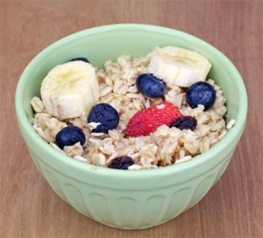
        - 2 - donut option 
         
            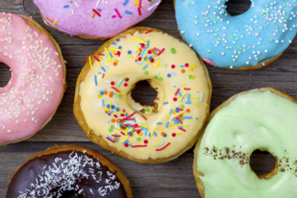
- _coffee_
    - question: which of the two pictures you associate with the word coffee?
        - 1 - creamy frapuccino 

            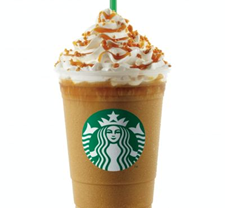
        - 2 - espresso shown (healthy option)
                 
            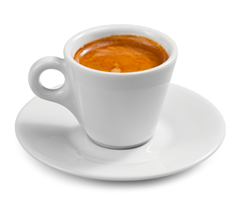
- _drink_
    - question: which picture do you associate with the word “drink”?
        - 1 - orange juice
        
            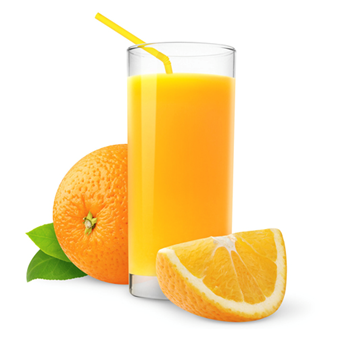
        - 2 - soda
        
            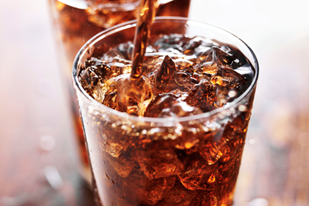
            
- _fries_
    - question: which of these pictures you associate with word fries? 
        - 1 - Mcdonald's fries
        
            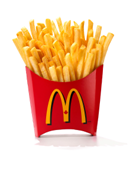
        - 2 - home fries
        
            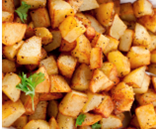
            
- _soup_
    - question: Which of the two pictures you associate with the word soup?
        - 1 - veggie soup
        
            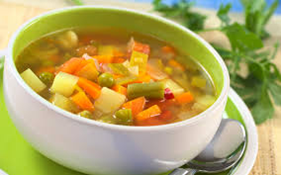
        - 2 - creamy soup
        
            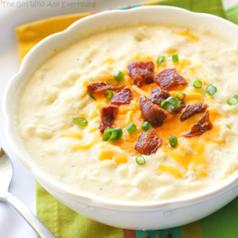

#### Function to count words in each food category

The function recieves a data frame, column name, dictionary of categories, and dictionary of stopwords. It processing the target column of the data frame by tokenizing the words and comparing them to the dictionary values. Stopwords are ignored and if a word matches a categories value then that category count increases by one for each matching word. The categories and stopword values were constructed by iterating over the columns and assign unclassified words into an appropriate category.

In [307]:
# Create a function that can process each free text column that contains a list of foods

def food_count(dfIn, column, categories, stopwords):
    # Stopwords based on review of text values

    
    # Empty set to collect clean food words
    clean_food = set()
    
    # Iterate through the column to identify the clean words
    for value in dfIn[column].str.lower():
        try:
            words = nltk.word_tokenize(value)
            #going thru each tokenized phrase
            for w in words:
                if w not in stopwords:
                    
                    #getting a clean list of foods
                    clean_food.add(w)    
        except:
            continue # Ignore NaN value
    print(f'\tKeywords identified: {len(clean_food)}\n{clean_food}')
    
    
    # Create new columns for each of the categories with a prefix of the source column
    for cat in categories:
        df[column + '_fc_' + cat] = 0 #stands for food_childhood_fooditem
    df[column + '_fc_other'] = 0
    df[column + '_fc_otherValues'] = ''
        
    #converting values from the column into new category columns depending on value
    #same idea as above but now tokenize each row and call into those words to determine which column (above was just one big list together)
    for index, row in df.iterrows():
        try:
            # tokenize the column text, remove stopwords, add a value to targect column if a keyword is found
            words = nltk.word_tokenize(row[column].lower())
            words = [w for w in words if w not in stopwords]
            for word in words:
                    catAssinged = False
                    for cat in categories:
                        if word in categories[cat]:
                            df.at[index, column + '_fc_' + cat] += 1
                            catAssigned = True
                            
                            # Remove the word from the clean_food set
                            try:
                                clean_food.remove(word)
                            except:
                                continue
                                
                        # Break loop if the word has been assigned to a category
                        if catAssinged: break

                    if not catAssinged:
                        df.at[index, column + '_fc_other'] += 1
                        df.at[index, column+'_fc_otherValues'] = df.at[index, column+'_fc_otherValues'] + "," + word
        #except KeyError:
        #    continue
        except AttributeError:
            # Error thrown by NaN values, ignore row
            continue 
    
    df[column+'_fc_otherValues'] = df[column+'_fc_otherValues'].str[1:]
    
    print(f'\n\n\tKeywords not counted: {len(clean_food)}\n{clean_food}')

In [316]:
# Enter parameters to create new columns from the target existing ones
stopwords = ['every', 'wings', 'such', 'me', "n't", 'mashed', 'a', 'feel', 'cheesy', 'day', 'out', 'cook',
            'orange', "'s", 'little', 'of', 'my', 'one', 'way', 'current', 'so', '(', 'is', 'parmigiana',
            'food', 'would', 'cheesey', 'cherry', 'homemade', 'less', 'parmesan', 'grilled', 'are', 'rolls',
            'very', '3', 'scalloped', 'lunch', 'than', '.', 'much', 'now', 'home', 'butter', 'i', 'the', 'fry',
            'eat', '&', 'fingers', 'nuggets', 'diet', 'lots', 'wellhigh', 'enough', 'good', 'breakfast', 'be',
            'dad', 'with', 'dinner', 'fried', 'lot', 'time', 'at', 'alfredo', 'meals', 'what', 'tenders', 'that',
            'in', 'cob', 'breaded', 'add', 'garlic', '/', ',', 'more', 'consume', 'eating', 'only', 'parm', 'able',
            'as', 'foods', 'for', ')', 'n', 'meal', 'no', 'back', 'on', 'same', 'get', 'cooked', 'not', 'have',
            '-', 'also', 'none', 'to', 'do', 'but', 'it', 'low', 'or', 'ideally', 'want', 'intake', 'buttered',
            'like', 'adobo', 'cut', 'any', 'tender', 'wegmans', 'how', 'and', 'legs', 'all', 'each', 'ideal', 'anything',
            'microwaveable', 'frozen', 'grandma', 'indian', 'curry', 'debbie', 'dr', 'dr.', 'equal', 'complex', "'d",
            'some', 'has', 'oily', 'looks', 'quarter', 'cup', 'combines', 'preferably', 'keep', 'mine', 'source', 'brown',
            'glass', 'probably', 'calories', 'proportions', 'rather', 'serving', 'fats','targets', 'overly', 'colorful',
            'usually', 'portion', 'includes', 'mostly', 'section', 'greasy', 'addition', 'think', 'rain', 'vinaigrette',
            'etc', 'type', 'excess', '5', 'person', 'school', 'satisfied', 'remain', 'real', 'choices', 'tastes', 'after',
            'especially', 'blend', 'distribute', 'wholesome', 'kids', 'pretty', 'variety', 'go', 'energy',
            'will', 'bars', 'times', 'when', 'hard', 'opposed', 'fast','bad', 'being', 'was', '2-3', 'excessive', 'based',
            'lean', 'light', 'salt', 'make', 'weight', 'cutting', 'completely', 'an', 'groups', 'once', 'eventually',
            'fourth', 'own', 'portions', 'avoid', 'other', 'along', 'least', 'concrete', 'had', 'without', 'you', 'just',
            'here', 'going', 'involves', 'still', 'heavy', 'mexican', 'days', 'lifestyle', ';', 'store', 'difficult', 'mom',
             'this', '1500-2000', 'multiple', 'mix', 'money', 'everyday', 'try', 'should', 'absence']

categoriesDict = {'meat' : ['chicken', 'wing','protein','protien','proteins', 'hamburger', 'beef',
                            'chicken','meat','meats','red', 'burgers','white', 'meatball', 'hamburgers', 'burger'
                            'eggs','steak', 'turkey', 'egg', 'burgers', 'cheeseburgers', 'omelet'],
                  
                  'seafood' : ['tuna', 'seafood', 'sushi', 'fish', 'salmon'],
                  
                  'meatless-protien' : ['quinoa', 'almonds', 'peanut','nut', 'nuts'],
                  
                  'fruit' : ['fruits','fruit','veggies/fruits', 'watermelon', 'grapes', 'plantain', 'banana',
                             'raspberry'],
                  
                  'veggie' : ['salad','plant','plant-based', 'veggie', 'vegetables', 'vegetable', 'broccoli', 'peppers',
                              'vegtables', 'pepper', 'salsa', 'cucumber',  'potato', 'potatoes', 'carrots', 'squash', 'tomato',
                              'vegitibles', 'vegs', 'veggies', 'veg'],
                  
                  'carbs' : ['mac', 'macaroni', 'pizza', 'pizza/','pasta', 'spaghetti', 'pierogies',
                             'lasagna', 'noodles', 'tortellini', 'noodle','carbs','carbohydrates',
                             'pasta','toast','breads','sandwich','breads','wheat', 'pretzels', 'pretzals',
                             'rice', 'lasagne', 'mac-n-cheese', 'bread', 'naan', 'carb', 'carbohydrate',
                             'bagels', 'dough', 'cornbread', 'bread/crackers', 'pancakes', 'cereal', 'starch'],
                  
                  'junk' : ['processed','sugar','sweets','fat','junk','desserts','dessert','deserts',
                            'unhealthy','snacking','snack','snacks','snack/junk','greasy,','artificial',
                            'sugars','food/desserts','candy','fried', 'brownie', 'chocolate', 'pepsi', 'candy',
                            'mcdonalds', 'donuts', 'cake', 'cookie', 'chocolates', 'jerky', 'milkshakes', 'desserts',
                            'ice-cream', 'icecream', 'cookies', 'frosted', 'cheez-its', 'fries', 'twizzlers', 'pie', 'fires',
                            'macroons', 'macaroons', 'chex-mix', 'desserts' 'cream/milkshake', 'ritz', 'reese', 'dessets',
                            'nutella', 'brownies', 'ranch', 'cheesecake','sweet', 'sweat'],
                  
                  'healthy_tw' : ['healthy','fresh','organic','healthier','balanced','balance','organic/healthy','health',
                                  'refined','nutritious','nutrients', 'vegetarian', 'smoothies'],
                  
                  'water' : ['water','hydration','drink'],
                  
                  'dairy' : ['mozzarella', 'yogurt', 'cottage', 'cream', 'cheese', 'milk']
                  }

In [317]:
# Create new comfort_food columns for the target collection of foods
print('comfort_food')
food_count(df, 'comfort_food', categoriesDict, stopwords)

print('\n\n\n\n')
# Create new food_childhood columns for the target collection of foods
print('food_childhood')
food_count(df, 'food_childhood', categoriesDict, stopwords)

print('\n\n\n\n')
# Create new healthy_meal columns for the target collection of foods
print('healthy_meal')
food_count(df, 'healthy_meal', categoriesDict, stopwords)

print('\n\n\n\n')
# Create new healthy_meal columns for the target collection of foods
print('ideal_diet')
food_count(df, 'ideal_diet', categoriesDict, stopwords)

comfort_food
	Keywords identified: 139
{'brownie', 'bar', 'protein', 'salsa', 'nuggs', 'donuts', 'macaroons', 'rice', 'dishes', 'deli', 'macaroni', 'chocolate', 'pepsi', 'vinegar', 'sponge', 'pretzals', 'egg', 'chex-mix', 'sandwhich', 'sweets', 'terra', 'bread', 'ice-cream', 'dessets', 'dark', 'naan', 'cream/milkshake', 'jerky', 'pot', 'steak', 'ritz', 'almonds', 'masala', 'dip', 'pie', 'watermelon', 'reese', 'truffles', 'lasagne', 'kat', 'tuna', 'milkshakes', 'snacks', 'cups', 'korean', 'cookies', 'hot', 'french', 'nutella', 'pasta', 'chinese', 'banana', 'doughnuts', 'sub', 'spaghetti', 'saltfish', 'frosted', 'pizza', 'bagels', 'cucumber', 'peanut', 'fires', 'crea', 'cottage', 'pierogies', 'moe', 'dough', 'capps', 'carrots', 'chocolates', 'fritos', 'pretzels', 'mcdonalds', 'plantain', 'moes', 'cheez-its', 'mac-n-cheese', 'icecream', 'chips', 'omelet', 'broccoli', 'popcorn', 'squash', 'fries', 'chilli', 'bread/crackers', 'soda', 'burger', 'seaweed', 'beef', 'pop', 'cheese', 'tomato', '

In [ ]:
#calculate healthiness score - low score for healthest options (new feature)

#breakfast = 1 (Cereal), 2 (donuts). 1 = healthy (H), 2 = unhealthy (UH)
#coffee = 1 (creamy frapuccino), 2 (espresso). 1 = UH, 2 = H
#drink = 1 (orange juice), 2 (soda). 1 = H, 2 = UH
#fries = 1 (McDonalds fries), 2 (home fries). 1 = UH, 2 = H
#soup = 1 (vegetable soup), 2 (creamy soup). 1 = H, 2 = UH

#checking column types
df.dtypes


#recoding columns - 0 is healthier option, 1 is unhealthier option
df['rbreakfast'] = [0 if x == 1 else 1 for x in df['breakfast']]
df['rcoffee'] = [0 if x == 2 else 1 for x in df['coffee']]
df['rdrink'] = [0 if x == 1 else 1 for x in df['drink']]
df['rfries'] = [0 if x == 2 else 1 for x in df['fries']]
df['rsoup'] = [0 if x == 1 else 1 for x in df['soup']]
df.head(20)

#total healthiness score 
df['healthiness_score'] = df['rbreakfast'] + df['rcoffee'] + df['rdrink'] + df['rfries'] + df['rsoup']
df.head(20)


In [36]:
#calculate healthiness score - low score for healthest options (new feature)

#breakfast = 1 (Cereal), 2 (donuts). 1 = healthy (H), 2 = unhealthy (UH)
#coffee = 1 (creamy frapuccino), 2 (espresso). 1 = UH, 2 = H
#drink = 1 (orange juice), 2 (soda). 1 = H, 2 = UH
#fries = 1 (McDonalds fries), 2 (home fries). 1 = UH, 2 = H
#soup = 1 (vegetable soup), 2 (creamy soup). 1 = H, 2 = UH

#checking column types
df.dtypes


#recoding columns - 0 is healthier option, 1 is unhealthier option
df['rbreakfast'] = [0 if x == 1 else 1 for x in df['breakfast']]
df['rcoffee'] = [0 if x == 2 else 1 for x in df['coffee']]
df['rdrink'] = [0 if x == 1 else 1 for x in df['drink']]
df['rfries'] = [0 if x == 2 else 1 for x in df['fries']]
df['rsoup'] = [0 if x == 1 else 1 for x in df['soup']]
df.head(20)

#total healthiness score 
df['healthiness_score'] = df['rbreakfast'] + df['rcoffee'] + df['rdrink'] + df['rfries'] + df['rsoup']
df.head(20)


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,Unnamed: 61,61,comfort_food_fc_meat,comfort_food_fc_fruit,comfort_food_fc_veggie,comfort_food_fc_carbs,comfort_food_fc_junk,comfort_food_fc_healthy_tw,comfort_food_fc_water,comfort_food_fc_other,comfort_food_fc_otherValues,food_childhood_fc_meat,food_childhood_fc_fruit,food_childhood_fc_veggie,food_childhood_fc_carbs,food_childhood_fc_junk,food_childhood_fc_healthy_tw,food_childhood_fc_water,food_childhood_fc_other,food_childhood_fc_otherValues,healthy_meal_fc_meat,healthy_meal_fc_fruit,healthy_meal_fc_veggie,healthy_meal_fc_carbs,healthy_meal_fc_junk,healthy_meal_fc_healthy_tw,healthy_meal_fc_water,healthy_meal_fc_other,healthy_meal_fc_otherValues,ideal_diet_fc_meat,ideal_diet_fc_fruit,ideal_diet_fc_veggie,ideal_diet_fc_carbs,ideal_diet_fc_junk,ideal_diet_fc_healthy_tw,ideal_diet_fc_water,ideal_diet_fc_other,ideal_diet_fc_otherValues,meals_dinner_friend_fc_meat,meals_dinner_friend_fc_fruit,meals_dinner_friend_fc_veggie,meals_dinner_friend_fc_carbs,meals_dinner_friend_fc_junk,meals_dinner_friend_fc_healthy_tw,meals_dinner_friend_fc_water,meals_dinner_friend_fc_other,meals_dinner_friend_fc_otherValues,rbreakfast,rcoffee,rdrink,rfries,rsoup,healthiness_score
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.0,NaN,NaN,0,0,0,0,0,0,0,0,,1,0,0,1,0,0,0,2,"rice,chicken",0,0,0,0,0,0,0,2,"looks,oily",0,0,0,0,0,1,0,2,"being,healthy",1,0,0,1,0,0,0,3,"rice,chicken,soup",0,1,0,0,0,1
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"grains, veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.0,NaN,NaN,0,0,0,0,1,0,0,4,"chocolate,chips,ice,cream",2,0,0,0,0,0,0,6,"chicken,biscuits,beef,soup,baked,beans",1,1,0,0,0,0,0,8,"grains,veggies,grains,veggies,small,protein,fr...",1,1,0,1,0,0,0,12,"try,5-6,small,while,trying,properly,distribute...",2,0,0,1,0,0,0,3,"pasta,steak,chicken",0,0,1,1,0,2
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,240.0,NaN,NaN,0,0,0,2,0,0,0,5,"pizza,mac,cheese,ice,cream",1,0,0,1,0,0,0,4,"beef,stroganoff,tacos,pizza",1,1,1,0,0,2,0,5,"fresh,fruits,vegetables,organic,meats",0,1,0,0,0,3,0,4,"healthy,fresh,veggi

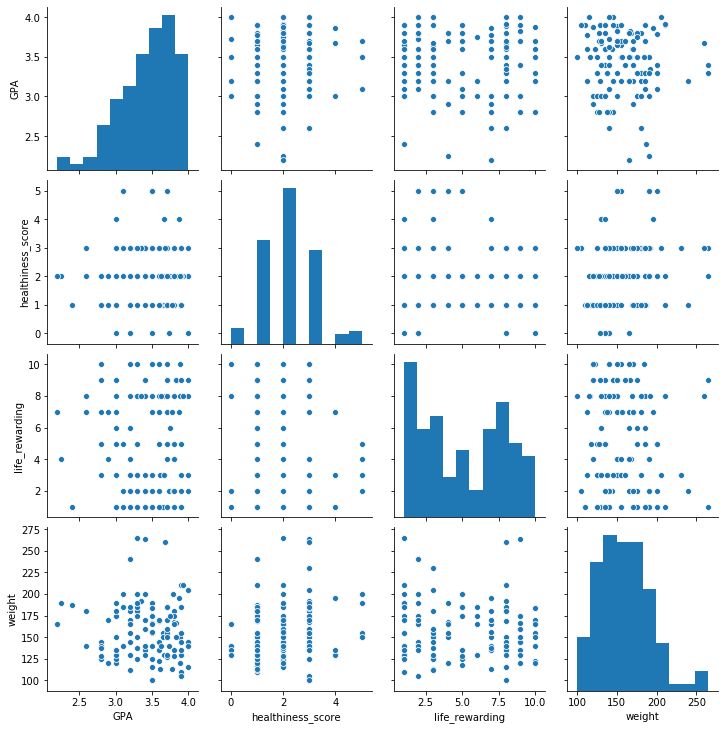

In [37]:
sns.pairplot(df.filter(['GPA','healthiness_score','life_rewarding', 'weight']))

In [318]:
import plotly.express as px

fig = px.scatter_3d(df, x='comfort_food_fc_meat', y='food_childhood_fc_meat', z='GPA', title= 'TEST')
fig.show()

In [319]:
# meat fruit veggie carbs junk healthy_tw water

fig = px.scatter_3d(df, x='comfort_food_fc_junk', y='healthiness_score', z='GPA', title= 'TEST')
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day', 'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons', 'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1', 'cuisine', 'diet_current', 'diet_current_coded', 'drink', 'eating_changes', 'eating_changes_coded', 'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food', 'exercise', 'father_education', 'father_profession', 'fav_cuisine', 'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day', 'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal', 'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food', 'italian_food', 'life_rewarding', 'marital_status', 'meals_dinner_friend', 'mother_education', 'mother_profession', 'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out', 'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food', 'tortilla_calories', 'turkey_calories', 'type_sports', 'veggies_day', 'vitamins', 'waffle_calories', 'weight', 'Unnamed: 61', '61', 'comfort_food_fc_meat', 'comfort_food_fc_fruit', 'comfort_food_fc_veggie', 'comfort_food_fc_carbs', 'comfort_food_fc_junk', 'comfort_food_fc_healthy_tw', 'comfort_food_fc_water', 'comfort_food_fc_other', 'comfort_food_fc_otherValues', 'comfort_food_fc_seafood', 'comfort_food_fc_meatless-protien', 'comfort_food_fc_dairy', 'food_childhood_fc_meat', 'food_childhood_fc_seafood', 'food_childhood_fc_meatless-protien', 'food_childhood_fc_fruit', 'food_childhood_fc_veggie', 'food_childhood_fc_carbs', 'food_childhood_fc_junk', 'food_childhood_fc_healthy_tw', 'food_childhood_fc_water', 'food_childhood_fc_dairy', 'food_childhood_fc_other', 'food_childhood_fc_otherValues', 'healthy_meal_fc_meat', 'healthy_meal_fc_seafood', 'healthy_meal_fc_meatless-protien', 'healthy_meal_fc_fruit', 'healthy_meal_fc_veggie', 'healthy_meal_fc_carbs', 'healthy_meal_fc_junk', 'healthy_meal_fc_healthy_tw', 'healthy_meal_fc_water', 'healthy_meal_fc_dairy', 'healthy_meal_fc_other', 'healthy_meal_fc_otherValues', 'ideal_diet_fc_meat', 'ideal_diet_fc_seafood', 'ideal_diet_fc_meatless-protien', 'ideal_diet_fc_fruit', 'ideal_diet_fc_veggie', 'ideal_diet_fc_carbs', 'ideal_diet_fc_junk', 'ideal_diet_fc_healthy_tw', 'ideal_diet_fc_water', 'ideal_diet_fc_dairy', 'ideal_diet_fc_other', 'ideal_diet_fc_otherValues'] but received: healthiness_score

<AxesSubplot:xlabel='words', ylabel='Count'>

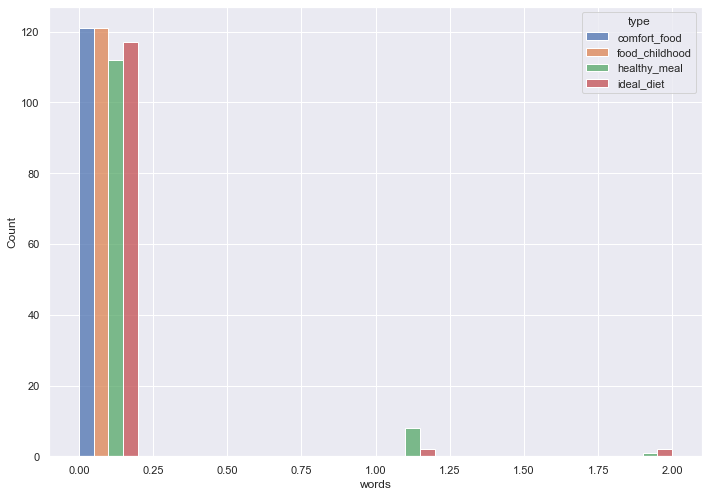

In [320]:
kw = 'water'
df1 = pd.DataFrame(df[f'comfort_food_fc_{kw}'])
df1['type'] = 'comfort_food'
df1['words'] = df1[f'comfort_food_fc_{kw}']

df2 = pd.DataFrame(df[f'food_childhood_fc_{kw}'])
df2['type'] = 'food_childhood'
df2['words'] = df2[f'food_childhood_fc_{kw}']

df8 = pd.DataFrame(df[f'healthy_meal_fc_{kw}'])
df8['type'] = 'healthy_meal'
df8['words'] = df8[f'healthy_meal_fc_{kw}']

df9 = pd.DataFrame(df[f'ideal_diet_fc_{kw}'])
df9['type'] = 'ideal_diet'
df9['words'] = df9[f'ideal_diet_fc_{kw}']

df3 = pd.concat([df1,df2,df8, df9])
df3 = df3.drop([f'comfort_food_fc_{kw}',f'food_childhood_fc_{kw}',f'healthy_meal_fc_{kw}',f'ideal_diet_fc_{kw}'], axis=1)
df3=df3.reset_index()
df3.head()
#df3.sample(n=20)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df3, x='words', hue='type', multiple='dodge')

<AxesSubplot:xlabel='words', ylabel='Count'>

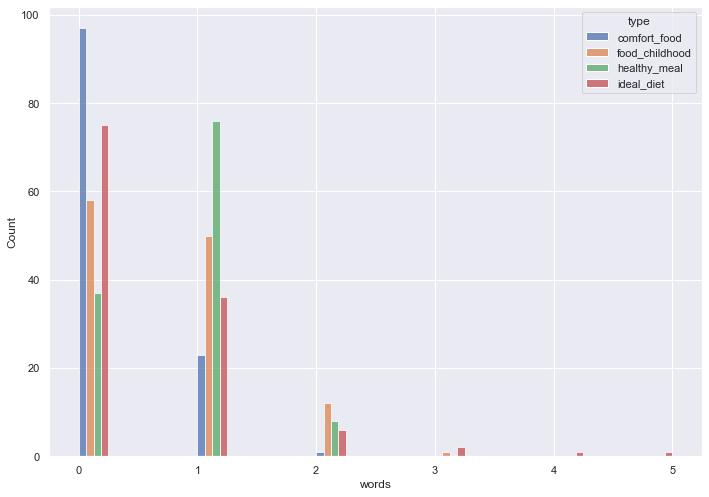

In [321]:
kw = 'meat'
df1 = pd.DataFrame(df[f'comfort_food_fc_{kw}'])
df1['type'] = 'comfort_food'
df1['words'] = df1[f'comfort_food_fc_{kw}']

df2 = pd.DataFrame(df[f'food_childhood_fc_{kw}'])
df2['type'] = 'food_childhood'
df2['words'] = df2[f'food_childhood_fc_{kw}']

df8 = pd.DataFrame(df[f'healthy_meal_fc_{kw}'])
df8['type'] = 'healthy_meal'
df8['words'] = df8[f'healthy_meal_fc_{kw}']

df9 = pd.DataFrame(df[f'ideal_diet_fc_{kw}'])
df9['type'] = 'ideal_diet'
df9['words'] = df9[f'ideal_diet_fc_{kw}']

df3 = pd.concat([df1,df2,df8, df9])
df3 = df3.drop([f'comfort_food_fc_{kw}',f'food_childhood_fc_{kw}',f'healthy_meal_fc_{kw}',f'ideal_diet_fc_{kw}'], axis=1)
df3=df3.reset_index()
df3.head()
#df3.sample(n=20)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df3, x='words', hue='type', multiple='dodge')

In [40]:
#food_childhood - split by comma delineator

#changing pandas display options
#pd.set_option("max_columns", None) 
#pd.set_option("max_rows", None)

#coverting to lowercase
#print(df['food_childhood'])
df['food_childhood'] = df['food_childhood'].str.lower()
print(df['food_childhood'])


#splitting based on comma
food_lst = df['food_childhood'].str.split(",")
#food_lst.head(20)


#getting list of words by tokenizing the split words from food_lst
import nltk
stopwords = ['and', '/', 'tender', 'fried', '&', 'grilled', 'scalloped', 'wings', 'on', 'the', 'cob', 'fingers', 'nuggets', 'parm', 'buttered', 
'garlic', 'legs', 'rolls', 'parmesan', 'orange', 'mashed', 'cheesy', 'tenders', 'parmigiana', 'fry', '.', 'adobo', 'food', 'with', 'dad', 'breaded', "'s", 
'cheesey', 'cherry', 'alfredo', 'butter', 'n', 'or', 'homemade', 'for', 'dinner']
clean_food = []
#calling into each row's list of foods
for lst in food_lst:
    try:
        #going thru the "words" separated by each comma
        for word in lst:
            #tokenizing each word
            temp = nltk.word_tokenize(word)
            #going thru each tokenized phrase
            for i in temp:
                if i not in stopwords:
                    #getting a clean list of foods
                    clean_food.append(i)
    except:
        TypeError #NaN is giving error so have to do this except
print(clean_food)


#seeing most common words
from collections import Counter
f_count = Counter(clean_food)
f_count.most_common(n=20)

#making categories based most common and creating columns that are all zeros to start
categories = ['chicken', 'pizza', 'macncheese', 'pasta', 'steak', 'potatoes', 'tacos', 'other']
for cat in categories:
    df['fc_' + cat] = 0 #stands for food_childhood_fooditem
#print(df)

#converting values from "food_childhood" column into new category column depending on value
#same idea as above but now tokenize each row and call into those words to determine which column (above was just one big list together)
for index, row in df.iterrows():
    try:
        comma_words = row['food_childhood'].split(",") #still have words with commas attached to them
        #print("words is:", words)
        for each in comma_words:
            word = nltk.word_tokenize(each)
            clean = [w for w in word if w not in stopwords]
            print('clean is:', clean)

            for i in clean:
                if i in ['chicken', 'wing']:
                    #print('hi')
                    df.at[index, 'fc_chicken'] += 1
                if i in ['pizza', 'pizza/']:
                    df.at[index, 'fc_pizza'] += 1
                if i in ['mac', 'macaroni']:
                    df.at[index, 'fc_macncheese'] += 1
                if i in ['pasta', 'spaghetti', 'lasagna', 'noodles', 'tortellini', 'noodle']:
                    df.at[index, 'fc_pasta'] += 1
                if i in ['steak']:
                    df.at[index, 'fc_steak'] += 1
                if i in ['potato', 'potatoes']:
                    df.at[index, 'fc_potatoes'] += 1
                if i in ['tacos']:
                    df.at[index, 'fc_tacos'] += 1
                if i in ['rice', 'biscuits', 'beef', 'soup', 'beans', 'fries','plaintain', 'fish', 'hamburgers', 'dogs', 
                'shrimp', 'eggs', 'pancakes', 'ham', 'corn','crab', 'curry', 'stew', 'saltfish', 'manacotti', 'deer',
                'crab', 'waffles', 'chocolate', 'biscuits', 'won', 'stir', 'cream', 'tarts', 'toast', 'pickles', 'chinese', 'hamloaf', 
                'perogies', 'roast', 'meatloaf', 'salmon', 'turkey', 'tomatoes', 'salad', 'quesadillas','meatballs',  'schnitzle',   
                'dip', 'sloppy', 'burgers', 'sandwich', 'pop-tarts', 'breakfast', 'peanut', 'jelly', 'celery', 'pockets', 'quesadilla', 
                'jollof', 'bread','salmon', 'tuna', 'casserole', 'sausage', 'manicotti', 'biryani',  'pita','dumplings',  'popcorn', 
                'vegetable', 'tiramisu', 'stromboli', 'isombe', 'plantains', 'ugali']:
                    df.at[index, 'fc_other'] += 1

    except:
        AttributeError
        
print(df)

0                                     rice  and chicken 
1           chicken and biscuits, beef soup, baked beans
3                          beef stroganoff, tacos, pizza
4                          pasta, chicken tender, pizza 
5                          fries, plaintain & fried fish
6                            grilled chicken, hamburgers
7                chicken, cheesey potatoes, and hot dogs
8                                      shrimp, spaghetti
9                                 pasta, eggs, pancakes 
10                                               chicken
11                           scalloped potatoes and ham 
12            pizza, chicken wings, and corn on the cob 
13                                  steak, lasagna, crab
14                                                 pizza
16                      curry, stew chicken and saltfish
17                chicken fingers, steak, mac and cheese
18                                               chicken
19                             

       GPA  Gender  breakfast  calories_chicken  calories_day  calories_scone  \
0    2.400       2          1               430           NaN           315.0   
1    3.654       1          1               610           3.0           420.0   
3    3.200       1          1               430           3.0           420.0   
4    3.500       1          1               720           2.0           420.0   
5    2.250       1          1               610           3.0           980.0   
6    3.800       2          1               610           3.0           420.0   
7    3.300       1          1               720           3.0           420.0   
8    3.300       1          1               430           NaN           420.0   
9    3.300       1          1               430           3.0           315.0   
10   3.500       1          1               610           3.0           980.0   
11   3.904       1          1               720           4.0           420.0   
12   3.400       2          

In [41]:
#food_childhood - split by comma delineator

#changing pandas display options
pd.set_option("max_columns", None) 
pd.set_option("max_rows", None)

#coverting to lowercase
#print(df['food_childhood'])
df['food_childhood'] = df['food_childhood'].str.lower()
print(df['food_childhood'])


#splitting based on comma
food_lst = df['food_childhood'].str.split(",")
#food_lst.head(20)


#getting list of words by tokenizing the split words from food_lst
import nltk
stopwords = ['and', '/', 'tender', 'fried', '&', 'grilled', 'scalloped', 'wings', 'on', 'the', 'cob', 'fingers', 'nuggets', 'parm', 'buttered', 
'garlic', 'legs', 'rolls', 'parmesan', 'orange', 'mashed', 'cheesy', 'tenders', 'parmigiana', 'fry', '.', 'adobo', 'food', 'with', 'dad', 'breaded', "'s", 
'cheesey', 'cherry', 'alfredo', 'butter', 'n', 'or', 'homemade', 'for', 'dinner']
clean_food = []
#calling into each row's list of foods
for lst in food_lst:
    try:
        #going thru the "words" separated by each comma
        for word in lst:
            #tokenizing each word
            temp = nltk.word_tokenize(word)
            #going thru each tokenized phrase
            for i in temp:
                if i not in stopwords:
                    #getting a clean list of foods
                    clean_food.append(i)
    except:
        TypeError #NaN is giving error so have to do this except
print(clean_food)


#seeing most common words
from collections import Counter
f_count = Counter(clean_food)
f_count.most_common(n=20)

#making categories based most common and creating columns that are all zeros to start
categories = ['chicken', 'pizza', 'macncheese', 'pasta', 'steak', 'potatoes', 'tacos', 'other']
for cat in categories:
    df['fc_' + cat] = 0 #stands for food_childhood_fooditem
#print(df)

#converting values from "food_childhood" column into new category column depending on value
#same idea as above but now tokenize each row and call into those words to determine which column (above was just one big list together)
for index, row in df.iterrows():
    try:
        comma_words = row['food_childhood'].split(",") #still have words with commas attached to them
        #print("words is:", words)
        for each in comma_words:
            word = nltk.word_tokenize(each)
            clean = [w for w in word if w not in stopwords]
            print('clean is:', clean)

            for i in clean:
                if i in ['chicken', 'wing']:
                    #print('hi')
                    df.at[index, 'fc_chicken'] += 1
                if i in ['pizza', 'pizza/']:
                    df.at[index, 'fc_pizza'] += 1
                if i in ['mac', 'macaroni']:
                    df.at[index, 'fc_macncheese'] += 1
                if i in ['pasta', 'spaghetti', 'lasagna', 'noodles', 'tortellini', 'noodle']:
                    df.at[index, 'fc_pasta'] += 1
                if i in ['steak']:
                    df.at[index, 'fc_steak'] += 1
                if i in ['potato', 'potatoes']:
                    df.at[index, 'fc_potatoes'] += 1
                if i in ['tacos']:
                    df.at[index, 'fc_tacos'] += 1
                if i in ['rice', 'biscuits', 'beef', 'soup', 'beans', 'fries','plaintain', 'fish', 'hamburgers', 'dogs', 
                'shrimp', 'eggs', 'pancakes', 'ham', 'corn','crab', 'curry', 'stew', 'saltfish', 'manacotti', 'deer',
                'crab', 'waffles', 'chocolate', 'biscuits', 'won', 'stir', 'cream', 'tarts', 'toast', 'pickles', 'chinese', 'hamloaf', 
                'perogies', 'roast', 'meatloaf', 'salmon', 'turkey', 'tomatoes', 'salad', 'quesadillas','meatballs',  'schnitzle',   
                'dip', 'sloppy', 'burgers', 'sandwich', 'pop-tarts', 'breakfast', 'peanut', 'jelly', 'celery', 'pockets', 'quesadilla', 
                'jollof', 'bread','salmon', 'tuna', 'casserole', 'sausage', 'manicotti', 'biryani',  'pita','dumplings',  'popcorn', 
                'vegetable', 'tiramisu', 'stromboli', 'isombe', 'plantains', 'ugali']:
                    df.at[index, 'fc_other'] += 1

    except:
        AttributeError
        
print(df)


0                                     rice  and chicken 
1           chicken and biscuits, beef soup, baked beans
3                          beef stroganoff, tacos, pizza
4                          pasta, chicken tender, pizza 
5                          fries, plaintain & fried fish
6                            grilled chicken, hamburgers
7                chicken, cheesey potatoes, and hot dogs
8                                      shrimp, spaghetti
9                                 pasta, eggs, pancakes 
10                                               chicken
11                           scalloped potatoes and ham 
12            pizza, chicken wings, and corn on the cob 
13                                  steak, lasagna, crab
14                                                 pizza
16                      curry, stew chicken and saltfish
17                chicken fingers, steak, mac and cheese
18                                               chicken
19                             

clean is: ['pizza']
clean is: ['spaghetti', 'tacos']
clean is: ['spaghetti', 'chicken', 'panini', 'sandwich']
clean is: ['spaghetti', 'pop-tarts']
clean is: ['pasta']
clean is: ['breakfast']
clean is: ['pizza']
clean is: ['peanut', 'jelly']
clean is: ['celery', 'peanut']
clean is: ['hot', 'pockets']
clean is: ['pizza']
clean is: ['quesadilla']
clean is: ['chocolate']
clean is: ['steak']
clean is: ['jollof', 'rice']
clean is: ['bread']
clean is: ['pasta']
clean is: ['chinese']
clean is: ['pizza']
clean is: ['chicken']
clean is: ['pasta']
clean is: ['chicken']
clean is: ['pizza']
clean is: ['steak']
clean is: ['chicken']
clean is: ['pizza']
clean is: ['spaghetti']
clean is: ['italian', 'potato', 'soup']
clean is: ['steak']
clean is: ['spaghetti']
clean is: ['salmon']
clean is: ['macaroni', 'cheese']
clean is: ['pizza']
clean is: ['chicken']
clean is: ['spaghetti']
clean is: ['cheese']
clean is: ['chicken']
clean is: ['wedding', 'soup']
clean is: ['pasta']
clean is: ['chicken']
clean is: 

## Visualization (8 points, 2 points each)
- Data visualization activity (box plot, bar plot, violin plot, and pairplot to see
relationships and distribution, etc.).
- Describe anything you find in the data after each visualization.
- What data visualization helped you understand about data distribution.
- What you did about possible outlier as per data distribution visualization. (Did you
confirm with your client whether it is actually an outlier or put a disclosure statement in your
notebook if you decided to remove it?)


HW 1 answer:
The survey contains two questions where the respondants were asked to list 3-5 comfort foods and provides reasons why they eat the comfort food. We see potential for the list of foods to be translated into several new attributes so that each food type can be analyzed separately. An additional feature was created from the reason question that capture the first reason mentioned. Second, third, or higher reasons can be added as new attributes.

       GPA  Gender  eating_out  healthiness_score  life_rewarding  weight  \
0    2.400       2           3                  1             1.0   187.0   
1    3.654       1           2                  2             1.0   155.0   
3    3.200       1           2                  1             2.0   240.0   
4    3.500       1           2                  2             1.0   190.0   
5    2.250       1           1                  2             4.0   190.0   
6    3.800       2           2                  1             8.0   180.0   
7    3.300       1           2                  3             3.0   137.0   
8    3.300       1           5                  3             8.0   180.0   
9    3.300       1           3                  1             3.0   125.0   
10   3.500       1           2                  2             8.0   116.0   
11   3.904       1           1                  1             1.0   110.0   
12   3.400       2           1                  3             9.0   264.0   

father_education_5.0   -0.286971
mother_education_1.0   -0.177751
father_education_1.0   -0.094097
marital_status_1.0     -0.080116
eating_out             -0.069257
Gender                 -0.047330
mother_education_5.0   -0.041743
weight                 -0.041165
mother_education_3.0   -0.004917
mother_education_4.0    0.000761
life_rewarding          0.002466
healthiness_score       0.042224
father_education_2.0    0.051622
marital_status_2.0      0.068169
father_education_3.0    0.100846
mother_education_2.0    0.154434
father_education_4.0    0.176583
Name: GPA, dtype: float64


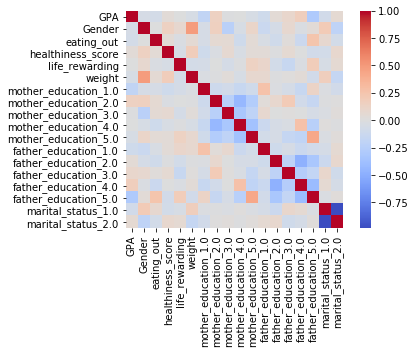

In [42]:
data=df[['GPA','Gender','eating_out','healthiness_score','life_rewarding','weight','mother_education','father_education', 'marital_status']]
data=pd.get_dummies(data, columns=['mother_education','father_education', 'marital_status'])
print(data)
corr = data.corr(method='pearson')
# plot the correlation matrix using seaborn
sns.heatmap(corr, cmap='coolwarm', annot=False, square=True)

# print the correlation coefficients for each variable
GPA_corr = corr['GPA'].sort_values(kind="quicksort")
GPA_corr=GPA_corr.drop('GPA')
print(GPA_corr)

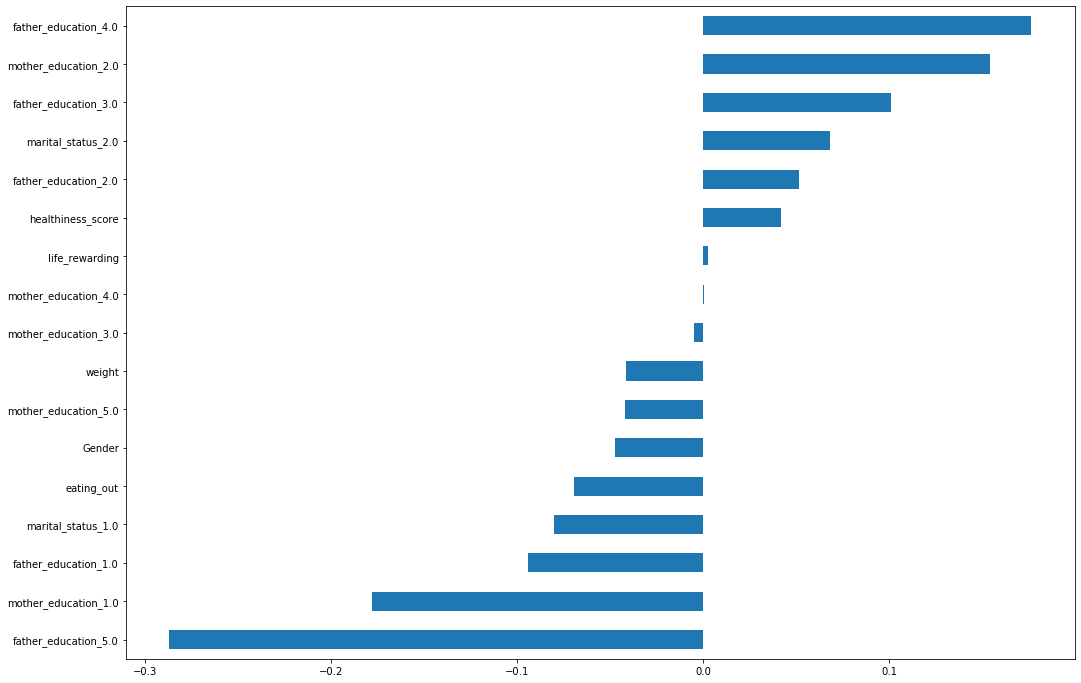

In [43]:
#import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize =(17,12))

#norm = TwoSlopeNorm(vmin=-1, vcenter =0, vmax=1)
#colors = [plt.cm.RdYlGn(norm(x)) for x in s.values]

GPA_corr.plot.barh()

#c.plot.barh()

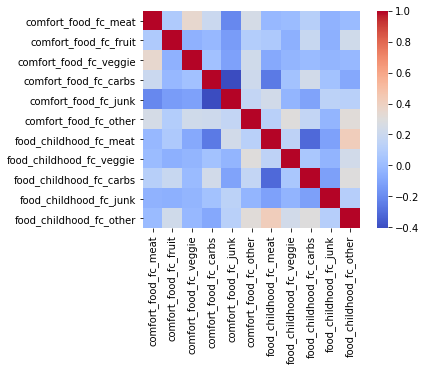

In [46]:
datafood=df[['comfort_food_fc_meat',
'comfort_food_fc_fruit',
'comfort_food_fc_veggie',
'comfort_food_fc_carbs',
'comfort_food_fc_junk',
'comfort_food_fc_other',
'comfort_food_fc_otherValues',
'food_childhood_fc_meat',
'food_childhood_fc_veggie',
'food_childhood_fc_carbs',
'food_childhood_fc_junk',
'food_childhood_fc_other',
'food_childhood_fc_otherValues']]
datafood_corr = datafood.corr(method='pearson')
sns.heatmap(datafood_corr, cmap='coolwarm', annot=False, square=True)
